# **Final Project Task 1 -Census Data Preprocess**

Requirements

- Encode data
- Handle missing values if any
- Correct errors, inconsistencies, remove duplicates if any
- Outlier detection and treatment if any
- Normalization / Standardization if necesarry
- Feature engineering
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder

In [25]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

# Handle missing data

In [26]:
for col in data.columns:
    if data[col].isnull().sum() > 0:
        mode_value = data[col].mode()[0]
        data[col].fillna(mode_value, inplace=True)
print("Missing values after imputation:")
print(data.isnull().sum())



Missing values after imputation:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


##Am tratat valorile lipsă marcate cu "?" prin înlocuirea lor cu moda fiecărei coloane respective
#Prin cod am facut o verificare pe fiecare coloană, și dacă are valori lipsă, acestea sunt completate cu valoarea cea mai frecventă (moda).

#Dupa cum se poate observa acum nu mai exista missing values

# Remove duplicates

In [27]:
data.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", data.shape)

Shape after removing duplicates: (32537, 15)


#prin acest cod am eliminat valorile duplicate din setul de date

# Detect and Remove Outliers

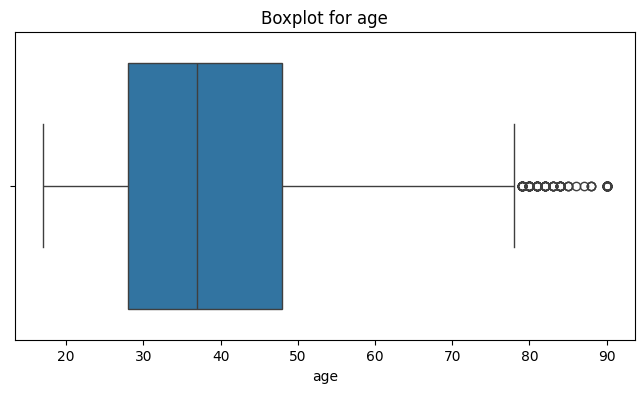

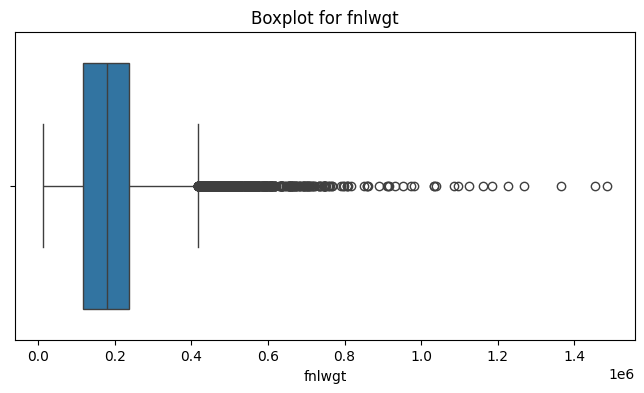

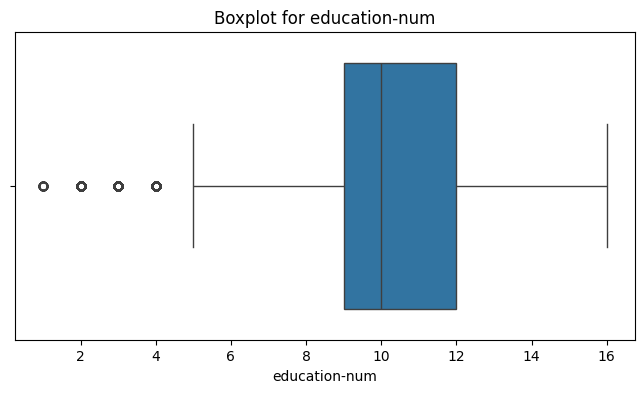

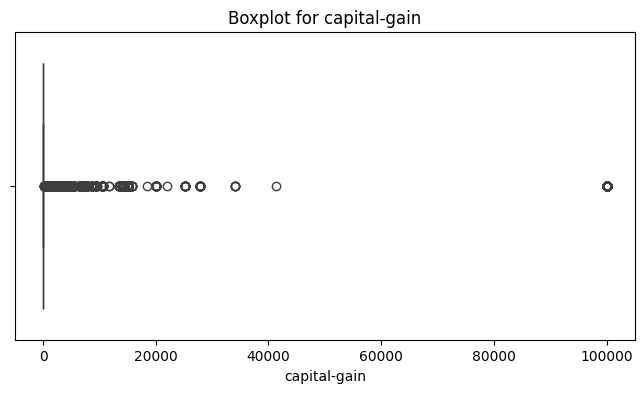

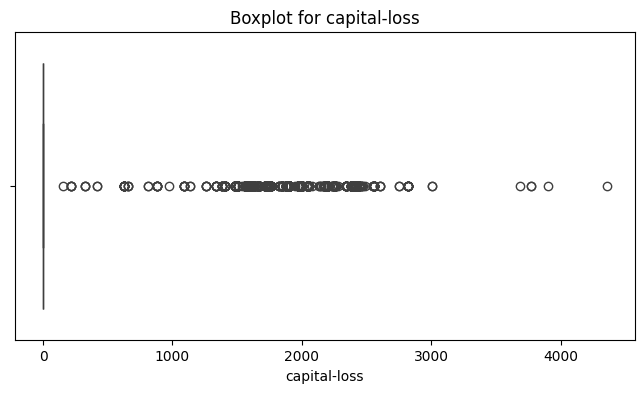

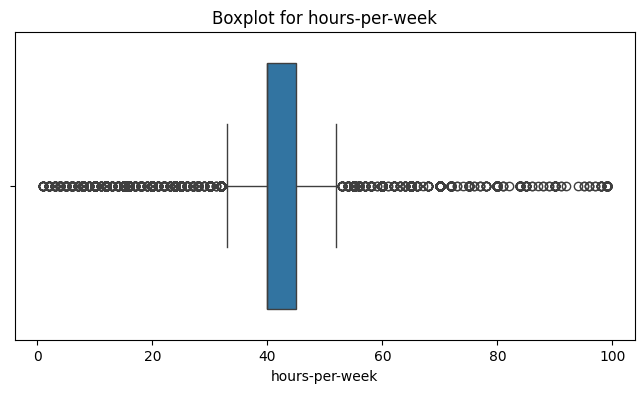

Shape after removing outliers: (18991, 15)


In [28]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

numerical_columns = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()
    data = detect_outliers_iqr(data, col)
print("Shape after removing outliers:", data.shape)

#Prin aceasta functie am facut :
#-IQR măsoară cât de dispersate sunt valorile din mijlocul dataset-ului.
#-1.5 * IQR este un prag utilizat frecvent pentru a defini outlierii. Valorile care depășesc upper_bound sau sunt sub lower_bound sunt considerate outlieri.
#-Funcția returnează doar datele care se încadrează între limitele calculate, eliminând astfel outlierii.

#GRAFICE INTERPRETARE:
#1. **Capital-loss** și **Capital-gain**:
  - Ambele variabile prezintă multe valori zero, ceea ce sugerează că majoritatea observațiilor nu au capital-loss sau capital-gain semnificativ.
  - Există câteva valori extreme (outliers), mai ales în cazul **capital-gain**, unde apar observații peste 40.000 și chiar aproape de 100.000.
#2. **Hours-per-week**:
  - Distribuția este concentrată în jurul valorii de 40 de ore pe săptămână.
  - Există câteva extreme peste 80 de ore, ceea ce indică un număr mic de persoane care lucrează mult mai mult decât media.
#3. **Education-num**:
  - Distribuția este destul de simetrică, cu câteva valori extreme mai mici.
  - Majoritatea observațiilor se află între 5 și 15 ani de educație.
#4. **Age**:
  - Distribuția este relativ normală, cu o concentrație între 20 și 50 de ani.
  - Există valori extreme peste 70-80 de ani, ceea ce ar putea fi analizat în detaliu.
#5. **fnlwgt (final weight)**:
  - Prezintă o distribuție foarte asimetrică cu multe valori extreme în partea superioară.
  - Acest lucru sugerează o variabilitate mare în ponderarea observațiilor.

#Concluzie generală: Setul de date conține variabile cu distribuții diferite, unele având multe valori extreme, de aceea am decis sa elimin valorile extreme pentru a putea normaliza setul de date.

# Encode Categorical Variables

In [29]:
categorical_columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"]
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print("Shape after encoding categorical variables:", data.shape)
print("Data after encoding categorical variables:")
print(data.head())


Shape after encoding categorical variables: (18991, 96)
Data after encoding categorical variables:
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   
5   37  284582             14             0             0              40   
7   52  209642              9             0             0              45   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
2                  False                False                   False   
3                  False                False                   False   
4                  False                False                   False   
5                  False                False                   False   
7                  False                False                   False   


#Prin acest encode:
#1. Identifică coloanele categoriale care trebuie convertite în variabile numerice.
#2. Utilizează pd.get_dummies() pentru a transforma variabilele categoriale în variabile binare (one-hot encoding).
#3. Elimină prima categorie (drop_first=True) pentru a evita colinearitatea.

#deoarece dupa cum se poate observa la variabilele fnlwgt, capital-gain si capital-loss au o distributie extrem de asimetrica ceea ce poate duce la probleme în anumite modele de învățare #automată sensibile la scara datelor.
#in ceea ce priveste variabilele age, education-num si hours-per-week au distribuții mai uniforme sau simetrice, dar valorile lor se află pe scări diferite.


# Feature engeneering

In [30]:
# Se creeaza o nouă coloană capital_diff care reprezintă diferența dintre capital-gain și capital-loss.
data["capital_diff"] = data["capital-gain"] - data["capital-loss"]
data.drop(columns=["capital-gain", "capital-loss"], inplace=True)

#Elimină coloanele originale capital-gain și capital-loss, deoarece informația lor este acum inclusă în capital_diff.


#Creează o variabilă binară high_income unde:
#1 = Venit peste 50K.
#0 = Venit sub 50K.
#Elimină vechea coloană income_>50K, deoarece noua coloană high_income conține aceleași informații într-un format mai simplu.

data["high_income"] = np.where(data["income_>50K"] == 1, 1, 0)
data.drop(columns=["income_>50K"], inplace=True)


In [31]:
# Grupare vârste
data["age_bins"] = pd.cut(data["age"], bins=[0, 25, 45, 65, 100], labels=["young", "adult", "middle-aged", "senior"])
data = pd.get_dummies(data, columns=["age_bins"], drop_first=True)

print("Feature Engineering Done. Columns:", data.columns)
print("Data after Feature Engineering:")
print(data.head())

Feature Engineering Done. Columns: Index(['age', 'fnlwgt', 'education-num', 'hours-per-week',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Prof-school', 'education_Some-college',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
     

#Acest cod:
Grupează vârstele în categorii:
young (0-25)
adult (26-45)
middle-aged (46-65)
senior (66+)
Transformă această nouă coloană în variabile binare (one-hot encoding).
Elimină prima categorie (drop_first=True) pentru a evita redundanța.

# Normalize/Standardize Data

In [32]:
scaler = StandardScaler()
numerical_columns = ["age", "fnlwgt", "education-num", "hours-per-week", "capital_diff"]
data_standardized = data.copy()
data_standardized[numerical_columns] = scaler.fit_transform(data_standardized[numerical_columns])

#Acest cod:
Aplică standardizarea folosind StandardScaler de la sklearn.
Transformă valorile astfel încât să aibă media 0 și deviația standard 1.
Este utilă pentru algoritmi care presupun distribuție normală (ex: regresie liniară, SVM, rețele neuronale).

In [33]:
# Alternativă: Normalizare
minmax_scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[numerical_columns] = minmax_scaler.fit_transform(data_normalized[numerical_columns])

#Acest cod:
Aplică normalizarea (scalare între 0 și 1).
Util pentru algoritmi sensibili la scară, cum ar fi rețele neuronale și KNN.

In [35]:
# Alternativă: Scaling robust
robust_scaler = RobustScaler()
data_robust = data.copy()
data_robust[numerical_columns] = robust_scaler.fit_transform(data_robust[numerical_columns])

print("Standardization, Normalization, and Robust Scaling Completed.")

Standardization, Normalization, and Robust Scaling Completed.


#Acest cod:
Aplică scalare robustă, care este mai puțin afectată de outlieri.
Se bazează pe mediană și IQR în loc de media și deviația standard.

# Train-Test Split

In [36]:
train_data, test_data = train_test_split(data_standardized, test_size=0.2, random_state=42)
print("Train Shape:", train_data.shape, "Test Shape:", test_data.shape)


Train Shape: (15192, 98) Test Shape: (3799, 98)


#Acest cod:
Împarte dataset-ul 80% pentru antrenare și 20% pentru testare.
random_state=42 asigură că împărțirea este reproductibilă.
Se face doar pe setul standardizat, dar poate fi aplicat și pe cel normalizat sau robust.

# Save Processed Data

In [37]:
train_data.to_csv("train_data_standardized.csv", index=False)
test_data.to_csv("test_data_standardized.csv", index=False)

train_data.to_csv("train_data_normalized.csv", index=False)
test_data.to_csv("test_data_normalized.csv", index=False)

train_data.to_csv("train_data_robust.csv", index=False)
test_data.to_csv("test_data_robust.csv", index=False)

print("Processed data saved.")

Processed data saved.


#Acest cod:
Salvează datele preprocesate în fișiere .csv, pentru a putea fi utilizate ulterior.
Se creează 3 variante diferite:
Standardizată (StandardScaler).
Normalizată (MinMaxScaler).
Scaled robust (RobustScaler).